In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [43]:
dataset = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/Fully_merged_dataset_Autogenerated.csv")

In [44]:
landusejoin = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/landuse_on_GISJOIN.csv")

In [45]:
landusejoin.head()

,GISJOIN,geometry,index_right,minyr,maxyr,varyr,resunits
0,G06007500101001001,8,8,1900.0,1900.0,0.000000,8.0
1,G06007500101001005,2,2,1900.0,1900.0,0.000000,2.0
2,G06007500101001006,8,8,1921.0,1993.0,23.998512,8.0
3,G06007500101001009,2,2,1900.0,1900.0,0.000000,2.0
4,G06007500101001011,8,8,1900.0,1974.0,24.712273,8.0


In [91]:
landusejoin.dtypes

GISJOIN         object
geometry         int64
index_right      int64
minyr          float64
maxyr          float64
varyr          float64
resunits       float64
dtype: object

In [46]:
years = np.arange(2007,2019)
o1 = list(landusejoin['GISJOIN'])
o2 = list(landusejoin['minyr'])
o3 = list(landusejoin['maxyr'])
o4 = list(landusejoin['varyr'])
o5 = list(landusejoin['resunits'])
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
indexcount = []
j = 0
for i in range(len(landusejoin)):
    
    a1 = o1[i]
    a2 = o2[i]
    a3 = o3[i]
    a4 = o4[i]
    a5 = o5[i]
    for year in years:
        n1.append(a1+str(year))
        n2.append(a2)
        n3.append(a3)
        n4.append(a4)
        n5.append(a5)
        indexcount.append(j)
        j += 1


In [47]:
landuse_blocks_years = pd.DataFrame({'GISYEARJOIN':n1,'minyr':n2, 'maxyr':n3, 'sdyr':n4,\
   'resunits':n5})

In [92]:
landuse_blocks_years.dtypes

GISYEARJOIN     object
minyr          float64
maxyr          float64
sdyr           float64
resunits       float64
dtype: object

In [48]:
landuse_blocks_years.head()

,GISYEARJOIN,minyr,maxyr,sdyr,resunits
0,G060075001010010012007,1900.0,1900.0,0.0,8.0
1,G060075001010010012008,1900.0,1900.0,0.0,8.0
2,G060075001010010012009,1900.0,1900.0,0.0,8.0
3,G060075001010010012010,1900.0,1900.0,0.0,8.0
4,G060075001010010012011,1900.0,1900.0,0.0,8.0


In [105]:
dataset2 = dataset.merge(landuse_blocks_years,how='left',on='GISYEARJOIN')

In [106]:
dataset2.dtypes

GISYEARJOIN             object
IDyear_x                 int64
LAT                    float64
LON                    float64
AREA                   float64
Nviolations            float64
Was complaint          float64
Inspection Number      float64
CrimeIsArson           float64
CrimeIsOther           float64
Structure_fire         float64
Vehicle_fire           float64
External_fire          float64
Year Property Built    float64
Assessed Land Value    float64
Number of Units        float64
Lot Area               float64
COMH                   float64
COMM                   float64
COMO                   float64
COMR                   float64
GOVT                   float64
IND                    float64
MISC                   float64
MRES                   float64
SRES                   float64
UnkownUseType          float64
A                      float64
B                      float64
C                      float64
                        ...   
H7X002                   int64
H7X003  

In [107]:
dataset2.columns

Index(['GISYEARJOIN', 'IDyear_x', 'LAT', 'LON', 'AREA', 'Nviolations',
       'Was complaint', 'Inspection Number', 'CrimeIsArson', 'CrimeIsOther',
       'Structure_fire', 'Vehicle_fire', 'External_fire',
       'Year Property Built', 'Assessed Land Value', 'Number of Units',
       'Lot Area', 'COMH', 'COMM', 'COMO', 'COMR', 'GOVT', 'IND', 'MISC',
       'MRES', 'SRES', 'UnkownUseType', 'A', 'B', 'C', 'D', 'S', 'H7X001',
       'H7X002', 'H7X003', 'H7X004', 'H7X005', 'H7X006', 'H7X007', 'H7X008',
       'H8C001', 'H8C002', 'H8C003', 'H8C004', 'H8C005', 'H8C006', 'H8C007',
       'H8C008', 'H8C009', 'IFC001', 'IFF001', 'IFF002', 'IFF003', 'IFF004',
       'Urban', 'IDyear_x.1', 'SF_pred', 'VF_pred', 'EF_pred', 'minyr',
       'maxyr', 'sdyr', 'resunits'],
      dtype='object')

In [108]:
dataset2['UnkownUseType'].fillna(1,inplace=True)

In [109]:
dataset2['S'].fillna(1,inplace=True)

In [110]:
dataset2.loc[:,['COMH', 'COMM', 'COMO', 'COMR', 'GOVT', 'IND', 'MISC',
       'MRES', 'SRES','A', 'B', 'C', 'D']].fillna(0.0,inplace=True)

In [111]:
values = {'COMH':0, 'COMM':0, 'COMO':0, 'COMR':0, 'GOVT':0, 'IND':0, 'MISC':0,
       'MRES':0, 'SRES':0, 'A':0, 'B':0, 'C':0, 'D':0}
dataset2 = dataset2.fillna(value=values)

In [112]:
dataset2.fillna(dataset2.mean(),inplace=True)

In [113]:
dataset2.columns

Index(['GISYEARJOIN', 'IDyear_x', 'LAT', 'LON', 'AREA', 'Nviolations',
       'Was complaint', 'Inspection Number', 'CrimeIsArson', 'CrimeIsOther',
       'Structure_fire', 'Vehicle_fire', 'External_fire',
       'Year Property Built', 'Assessed Land Value', 'Number of Units',
       'Lot Area', 'COMH', 'COMM', 'COMO', 'COMR', 'GOVT', 'IND', 'MISC',
       'MRES', 'SRES', 'UnkownUseType', 'A', 'B', 'C', 'D', 'S', 'H7X001',
       'H7X002', 'H7X003', 'H7X004', 'H7X005', 'H7X006', 'H7X007', 'H7X008',
       'H8C001', 'H8C002', 'H8C003', 'H8C004', 'H8C005', 'H8C006', 'H8C007',
       'H8C008', 'H8C009', 'IFC001', 'IFF001', 'IFF002', 'IFF003', 'IFF004',
       'Urban', 'IDyear_x.1', 'SF_pred', 'VF_pred', 'EF_pred', 'minyr',
       'maxyr', 'sdyr', 'resunits'],
      dtype='object')

In [114]:
dataset2.dtypes

GISYEARJOIN             object
IDyear_x                 int64
LAT                    float64
LON                    float64
AREA                   float64
Nviolations            float64
Was complaint          float64
Inspection Number      float64
CrimeIsArson           float64
CrimeIsOther           float64
Structure_fire         float64
Vehicle_fire           float64
External_fire          float64
Year Property Built    float64
Assessed Land Value    float64
Number of Units        float64
Lot Area               float64
COMH                   float64
COMM                   float64
COMO                   float64
COMR                   float64
GOVT                   float64
IND                    float64
MISC                   float64
MRES                   float64
SRES                   float64
UnkownUseType          float64
A                      float64
B                      float64
C                      float64
                        ...   
H7X002                   int64
H7X003  

In [115]:
dataset2.drop(['IDyear_y','Year','GISJOIN'],axis=1,inplace=True)

KeyError: "['IDyear_y' 'Year' 'GISJOIN'] not found in axis"

In [116]:
SF_blocks_years = gpd.read_file('SF_block_years_2010.shp')

In [117]:
Merged_geometry = SF_blocks_years.merge(dataset2,left_on='GISYEARJOI',right_on='GISYEARJOIN',how='left')

In [118]:
# Determine the number of blocks and fires
Merged_geometry [Merged_geometry['IDyear']==2018]['External_fire'].sum()

1213.0

In [119]:
#Classifier 
RC = RandomForestClassifier()
#Pipeline
RC_pipeline = Pipeline([('classify', RC)])
#Search parameter space with 5 fold cross validation

#Parameters to search over
test_parameters = {
    'classify__n_estimators': (150,200,250),
    'classify__max_depth': (5,8,10),
    'classify__min_samples_leaf':(50,60,80),
}

#Number of folds
nfolds=5

#Grid search object to set up
grid_search = GridSearchCV(RC_pipeline, test_parameters, \
                           scoring='roc_auc',verbose=1, cv=nfolds, n_jobs=4)


def perform_grid_search(pipeline_obj,grid_search_obj,X_train,y_train):
    
    '''
    Perform a grid search over hyperparmeters to generate the best model
    '''
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline_obj.steps])
    print("parameters:")
    print(test_parameters)
    t0 = time.time()
    
    #Do the grid search on the training dataset
    grid_search_obj.fit(X_train, y_train)
    
    print("done in %0.3fs" % (time.time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(test_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    #Return the best estimator object for use with the holdout dataset
    
    return grid_search.best_estimator_

def classify(val):
    
    if val >= 1:
        return 1
    else:
        return 0

In [120]:
len(dataset2)

88032

In [121]:
dataset2['minyr'] = dataset2['minyr'].astype(float)
dataset2['maxyr'] = dataset2['maxyr'].astype(float)
dataset2['sdyr'] = dataset2['sdyr'].astype(float)
dataset2['resunits'] = dataset2['resunits'].astype(float)

In [123]:
#This is a datasat for which we will predict the 2019 fires
use_for_future = dataset2[dataset2['IDyear_x']==2018]
#This is the dataset that we'll use to predict the 2018 fires
holdout_2018 = dataset2[dataset2['IDyear_x']==2017]
#This is the dataset that we'll train and test on
traintest = dataset2[dataset2['IDyear_x']<2017]

In [124]:
firecols = ['SF_pred','VF_pred','EF_pred']
todrop = ['GISYEARJOIN','IDyear_x.1']

In [125]:
fires = traintest[firecols] #This is what we're trying to predict

X = traintest.drop(firecols,axis=1) #This is what we're using to predict
X.drop(todrop,inplace=True,axis=1)

In [159]:
#Generate targert vector (1 or 0 depending on fire)
fire_to_predict = 'VF_pred'
y = fires[fire_to_predict].apply(classify)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [161]:
best_estimator = perform_grid_search(pipeline_obj=RC_pipeline,\
                        grid_search_obj=grid_search,X_train=X_train,y_train=y_train)

Performing grid search...
pipeline: ['classify']
parameters:
{'classify__n_estimators': (150, 200, 250), 'classify__max_depth': (5, 8, 10), 'classify__min_samples_leaf': (50, 60, 80)}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  8.7min finished


done in 538.181s

Best score: 0.769
Best parameters set:
	classify__max_depth: 10
	classify__min_samples_leaf: 50
	classify__n_estimators: 250


In [173]:
firecols = ['SF_pred','VF_pred','EF_pred']
todrop = ['GISYEARJOIN','IDyear_x.1']

In [174]:
firesholdout = holdout_2018[firecols] #This is what we're trying to predict
yholdout = firesholdout[fire_to_predict].apply(classify)
Xholdout = holdout_2018.drop(firecols,axis=1) #This is what we're using to predict
Xholdout.drop(todrop,inplace=True,axis=1)

In [175]:
fires_holdout_predict = best_estimator.predict_proba(Xholdout)

In [176]:
fpr, tpr, thresholds1 = roc_curve(np.array(yholdout).astype(int), fires_holdout_predict[:,1])

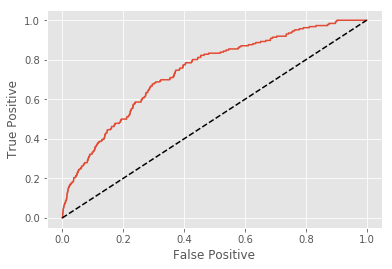

In [177]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--')
fname = 'AOC_%s.png' %fire_to_predict
plt.savefig(fname,dpi=400)

In [178]:
GISCELLS = list(holdout_2018['GISYEARJOIN'])

In [179]:
mapdata = SF_blocks_years[SF_blocks_years['GISYEARJOI'].isin(GISCELLS)]

In [180]:
riskmap_2018 = gpd.GeoDataFrame({'geometry':mapdata['geometry'],'fire_prob':fires_holdout_predict[:,1]})

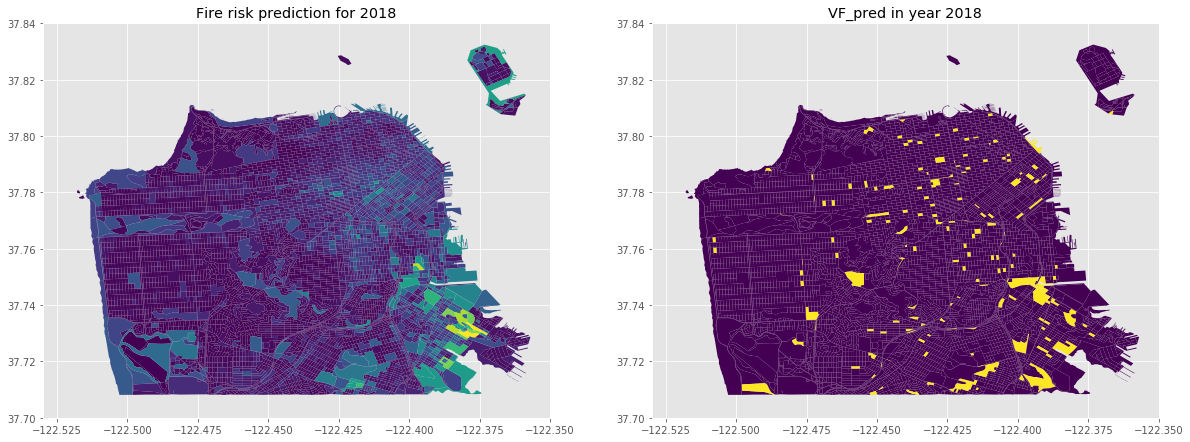

In [184]:
year = 2018
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
riskmap_2018.plot(column='fire_prob',ax=ax1)
ax1.set_xlim([-122.53,-122.35])
ax1.set_ylim([37.70,37.84])
ax1.set_title('Fire risk prediction for 2018')

ax2 = fig.add_subplot(122)
Merged_geometry[Merged_geometry['IDyear']==year].plot(column=Merged_geometry[Merged_geometry['IDyear']==year]['Vehicle_fire'].apply(classify),ax=ax2)
ax2.set_xlim([-122.53,-122.35])
ax2.set_ylim([37.70,37.84])
ax2.set_title("%s in year %s" %(fire_to_predict,str(year)))
plt.savefig("Expernal_fires_2018.png",dpi=400)
#plt.savefig("Fires_2018.png",dpi=400)

In [182]:
features = list(X.columns)
feature_importances = np.array(best_estimator.named_steps['classify'].feature_importances_)
farray = np.array(best_estimator.named_steps['classify'].feature_importances_).argsort()

In [183]:
count = 1
top_features = []
top_feature_names = []

for index in farray[::-1]:
    print('%02d %19s %.3f' %(count,features[index],feature_importances[index]))
    top_features.append(feature_importances[index])
    top_feature_names.append(features[index])
    count += 1
    if count == 50:
        break

01        CrimeIsOther 0.136
02                 LON 0.074
03       External_fire 0.069
04                AREA 0.066
05                 LAT 0.042
06              H7X003 0.041
07        Vehicle_fire 0.037
08              H7X006 0.032
09   Inspection Number 0.030
10              H8C006 0.030
11              H8C004 0.025
12                sdyr 0.020
13            resunits 0.018
14              H7X002 0.017
15 Assessed Land Value 0.016
16              H7X001 0.016
17               maxyr 0.016
18              H7X007 0.015
19               minyr 0.014
20              H7X005 0.014
21              IFC001 0.014
22              H8C002 0.014
23            IDyear_x 0.013
24              IFF004 0.013
25 Year Property Built 0.013
26              H8C003 0.013
27              H8C007 0.012
28                 IND 0.012
29              IFF001 0.012
30              H8C008 0.012
31              IFF002 0.011
32     Number of Units 0.011
33              H8C001 0.011
34              IFF003 0.011
35            